In [1]:
from subprocess import Popen
import os
import json
import sys
from signal import SIGINT, SIGTERM
from tempfile import NamedTemporaryFile
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload explicit
%aimport visualize

In [3]:

(stdin, send_stdin) = os.pipe()  # for parent -> child writes
(recv_stdout, stdout) = os.pipe()  # for child -> parent writes
#(recv_stderr, stderr) = os.pipe()
outfile = os.fdopen(send_stdin, 'w', buffering=1) #Buffer line by line
infile = os.fdopen(recv_stdout)

def communicate(obj):
    outfile.write(json.dumps(obj))
    outfile.write('\n')
    outfile.flush()
    if child.poll():
        return child.wait()
    return json.loads(infile.readline())

def raytrace(inp):
    inp = inp.copy()
    with NamedTemporaryFile(suffix='.bin', mode='w+b') as f:
        inp['bin_file'] = f.name
        img_md = communicate(inp)
        img = f.read()
    return (img, img_md)

In [4]:
child = Popen(['/Users/seth/Code/celeritas/build/bin/celer-geo', '-'],
              stdin=stdin, stdout=stdout,
              env={"CELER_LOG": "diagnostic",
                   "CELER_COLOR": "1"})

In [5]:
communicate({"geometry_file": "/Users/seth/Code/celeritas/app/data/two-boxes.gdml"})

info: Reading JSON line input from <stdin>
diagnostic: Waiting for model setup
info: Loading Geant4 geometry from GDML at /Users/seth/Code/celeritas/app/data/two-boxes.gdml
diagnostic: G4GDML: Reading '/Users/seth/Code/celeritas/app/data/two-boxes.gdml'...
diagnostic: G4GDML: Reading solids...
diagnostic: G4GDML: Reading structure...
diagnostic: G4GDML: Reading setup...
diagnostic: G4GDML: Reading '/Users/seth/Code/celeritas/app/data/two-boxes.gdml' done!
diagnostic: ... 0.0176729 s


{'cuda_heap_size': None,
 'cuda_stack_size': None,
 'geometry_file': '/Users/seth/Code/celeritas/app/data/two-boxes.gdml',
 'sizeof_int': 4}

In [6]:
inp = {
'geometry': 'orange',
 'image': {'_units': 'cgs',
  'lower_left': [-10.0, -10.0, 0.0],
  'rightward': [1.0, 0.0, 0.0],
  'upper_right': [10.0, 10.0, 0.0],
  'vertical_pixels': 32},
 'memspace': 'host',
 'volumes': True,
'bin_file': None,
}

status: Tracing orange image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmpiizo890_.bin'


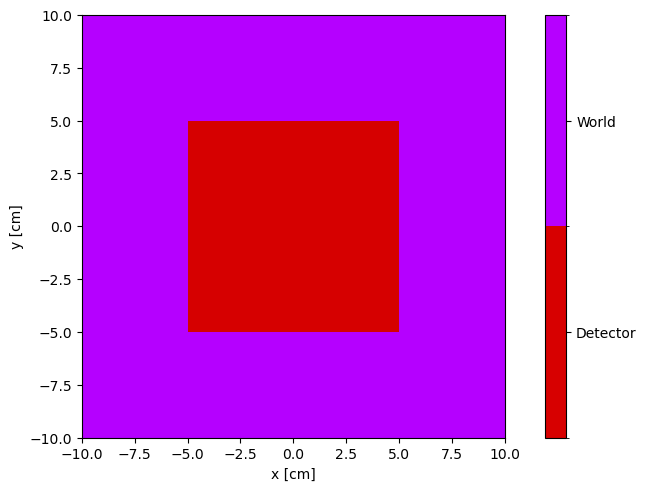

In [7]:
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained")
im = visualize.load_and_plot_image(ax, img_md, img)

status: Tracing geant4 image on host
info: Writing image to '/var/folders/n9/mqnx20b929z469f6p3fbq7c40000gn/T/tmpvpq97ibb.bin'


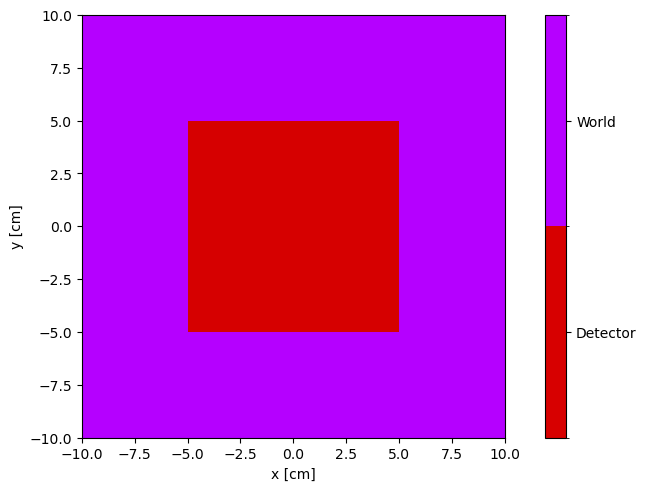

In [8]:
inp['geometry'] = 'geant4'
(img, img_md) = raytrace(inp)
(fig, ax) = plt.subplots(layout="constrained")
im = visualize.load_and_plot_image(ax, img_md, img)

In [9]:
inp['geometry'] = 'vecgeom'
(img, img_md) = raytrace(inp)

status: Tracing vecgeom image on host
/Users/seth/Code/celeritas/app/celer-geo/celer-geo.cc:214: error: Failed raytrace: /Users/seth/Code/celeritas/app/celer-geo/Runner.cc:189:
celeritas: required dependency is disabled in this build: vecgeom


In [10]:
img_md

{'condition': 'vecgeom',
 'file': '/Users/seth/Code/celeritas/app/celer-geo/Runner.cc',
 'line': 189,
 'type': 'DebugError',
 'which': 'required dependency is disabled in this build'}

In [11]:
communicate(None)

diagnostic: Exiting raytrace loop


{'runtime': {'device': None,
  'kernels': [],
  'version': '0.5.0-dev.95+f43de38ec'},
 'timers': {'load_geant4': 0.0198085,
  'load_orange': 0.004232625,
  'trace_host': 0.005628790999999999}}